# From Posts to Profits
## A deep dive into the sentiment analysis of Reddit posts surrounding the 2021 short squeezes in the stock market

This project aims to understand the effects of social media platforms, namely Reddit's WallStreetBets, on the stock market. There will be significant exploration into the way we can automate understanding of these platforms, and how improving language processing technologies could be implemented into professional financial analysis techniques.

## The Dataset
### Familiarisation & Pre-Processing

In [9]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load the reddit_wsb.csv dataset
post_data = pd.read_csv("reddit_wsb.csv")

In [11]:
# Summarise the dataset
post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  object 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [12]:
# See what we are working with
post_data.head(10)

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37


In [13]:
# Reformat Dates into More Useful Information
post_data["date"] = pd.to_datetime(post_data.timestamp).dt.date
post_data["hour"] = pd.to_datetime(post_data.timestamp).dt.hour
post_data["post_count"] = 1

In [14]:
# See what we are working with now
post_data.head(10)

,title,score,id,url,comms_num,created,body,timestamp,date,hour,post_count
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28,21,1
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28,21,1
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,21,1
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28,21,1
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28,21,1
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30,2021-01-28,21,1
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28,21,1
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,2021-01-28,21,1
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16,2021-01-28,21,1
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37,2021-01-28,21,1


### Timeline of Interactions
By collating the Reddit posts into a timeline, we can visualise the level of interaction witnessed on WallStreetBets near the short squeezes of 2021.

In [15]:
# Aggregation of the data into a simple timeline can help us visualise a timeline of events according to the sentiment data.
coll_date = post_data.groupby("date").aggregate({"score": "mean", "comms_num": "mean", "post_count": "sum"})
coll_hour = post_data.groupby("hour").aggregate({"score": "mean", "comms_num": "mean", "post_count": "sum"})

In [16]:
coll_date.head(10)

,score,comms_num,post_count
date,,,
2020-09-29,4.000000,11.000000,1
2021-01-28,960.609023,142.193818,1197
2021-01-29,408.457309,52.371288,15694
2021-01-30,4618.594101,515.766152,1424
2021-01-31,5230.513312,306.713525,939
2021-02-01,4230.302036,531.211538,884
2021-02-02,786.005326,101.698402,1502
2021-02-03,983.322361,128.741203,2643
2021-02-04,955.487732,78.284859,1671


In [17]:
coll_hour.head(10)

,score,comms_num,post_count
hour,,,
0,2436.905911,228.987937,1658
1,326.426259,47.146635,10625
2,469.184596,51.459178,7790
3,960.162338,122.512266,4158
4,1704.327192,151.172439,2714
5,1637.641885,144.556021,1910
6,2301.749359,300.580215,1951
7,2459.783157,1170.991050,2458
8,2176.641379,143.985714,2030


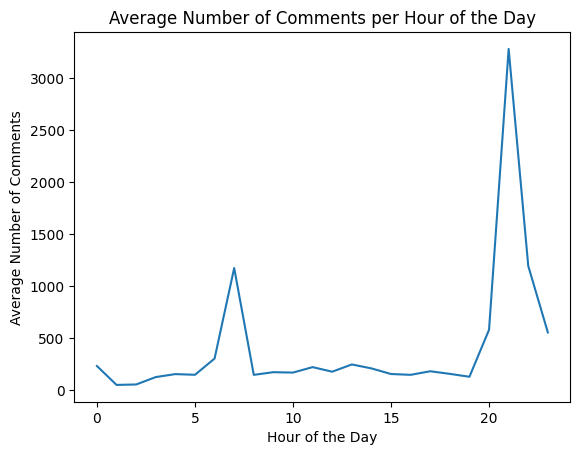

In [18]:
# Plot the comms_num against the hour of the day
plt.plot(coll_hour.index, coll_hour.comms_num)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Comments")
plt.title("Average Number of Comments per Hour of the Day")
plt.show()

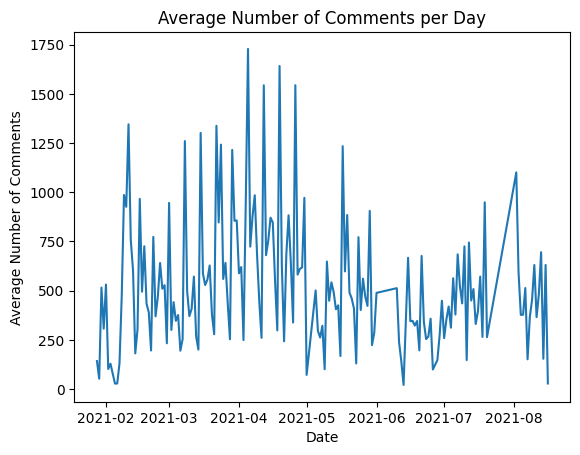

In [19]:
# Plot the comms_num against the date (trimmed to only show the relevant dates)
plt.plot(coll_date.index[1:], coll_date.comms_num[1:])
plt.xlabel("Date")
plt.ylabel("Average Number of Comments")
plt.title("Average Number of Comments per Day")
plt.show()

#### Insights
- The average number of comments per post raises just before the market opens, and first peaks at around 7am. This could be due to the anticipation of the market opening, discussions about pre-market trading, or the release of news.
- We also see a significant peak at around 9pm, which could be due to the market closing as well as the communication of the day's gains and losses.
- An important insight is that the average number of comments, when aggregated by date, shows increasing activity following the short squeezes of January 2021. This could be due to the increased interest in the stock market following the GameStop short squeeze, or the increased interest in WallStreetBets as a platform.
- Over time, as the short squeezes become less prominent in the news, the average number of comments per post decreases.

### Further Pre-Processing Before Sentiment Analysis

The sentiment analysis will initially be conducted using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool. This tool is specifically designed to analyse social media text, and is particularly useful for analysing the sentiment of Reddit posts, but lacks the ability to understand the context of the text. This is where the limitations of the tool come into play, as it may not be able to understand the context of the text, and may not be able to accurately determine the sentiment of the text.

Before we can conduct the sentiment analysis, we need to pre-process the text data.

In [20]:
post_data["text"] = post_data.title + ' ' + post_data.body.astype(str)

In [21]:
post_data.head(10)

,title,score,id,url,comms_num,created,body,timestamp,date,hour,post_count,text
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28,21,1,"It's not about the money, it's about sending a..."
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28,21,1,Math Professor Scott Steiner says the numbers ...
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,21,1,Exit the system The CEO of NASDAQ pushed to ha...
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28,21,1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28,21,1,"Not to distract from GME, just thought our AMC..."
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30,2021-01-28,21,1,WE BREAKING THROUGH nan
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28,21,1,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE He...
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,2021-01-28,21,1,THIS IS THE MOMENT Life isn't fair. My mother ...
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16,2021-01-28,21,1,Currently Holding AMC and NOK - Is it retarded...
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37,2021-01-28,21,1,I have nothing to say but BRUH I am speechless...


### Sentiment Analysis - VADER

Initially, we will use VADER to conduct the sentiment analysis.

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
# Initialise the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [33]:
# Apply the SentimentIntensityAnalyzer to the text data, returning 'negative', 'neutral', or 'positive' depending on the sentiment score being less than 0, equal to 0, or greater than 0 respectively.
post_data['vader_sentiment'] = post_data['text'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else ('negative' if sia.polarity_scores(x)['compound'] < 0 else 'neutral'))

In [34]:
post_data.head(10)

,title,score,id,url,comms_num,created,body,timestamp,date,hour,post_count,text,vader_sentiment,textblob_sentiment
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28,21,1,"It's not about the money, it's about sending a...",neutral,neutral
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28,21,1,Math Professor Scott Steiner says the numbers ...,negative,neutral
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,21,1,Exit the system The CEO of NASDAQ pushed to ha...,negative,positive
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28,21,1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,negative,negative
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28,21,1,"Not to distract from GME, just thought our AMC...",positive,positive
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30,2021-01-28,21,1,WE BREAKING THROUGH nan,neutral,neutral
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28,21,1,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE He...,positive,negative
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,2021-01-28,21,1,THIS IS THE MOMENT Life isn't fair. My mother ...,negative,negative
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16,2021-01-28,21,1,Currently Holding AMC and NOK - Is it retarded...,negative,negative
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37,2021-01-28,21,1,I have nothing to say but BRUH I am speechless...,neutral,neutral


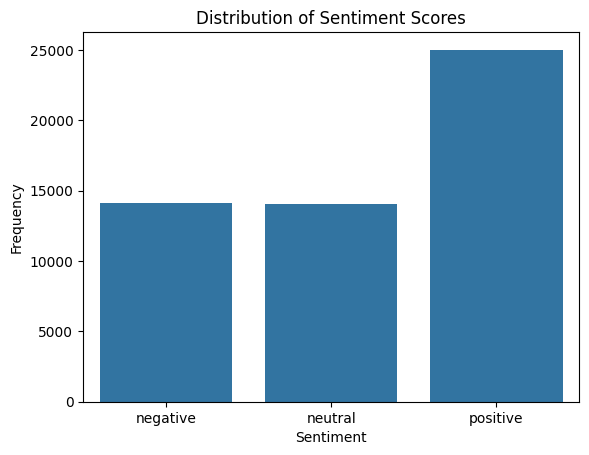

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
sns.countplot(x='vader_sentiment', data=post_data, order=['negative', 'neutral', 'positive'])
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

### Sentiment Analysis - TextBlob

In [27]:
from textblob import TextBlob

In [28]:
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return "positive"
    elif blob.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

post_data['textblob_sentiment'] = post_data['text'].apply(get_textblob_sentiment)

In [29]:
post_data.head(10)

,title,score,id,url,comms_num,created,body,timestamp,date,hour,post_count,text,vader_sentiment,textblob_sentiment
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28,21,1,"It's not about the money, it's about sending a...",0.0000,neutral
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28,21,1,Math Professor Scott Steiner says the numbers ...,-0.7034,neutral
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,21,1,Exit the system The CEO of NASDAQ pushed to ha...,-0.4199,positive
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28,21,1,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,-0.4822,negative
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28,21,1,"Not to distract from GME, just thought our AMC...",0.2235,positive
5,WE BREAKING THROUGH,405,l6uf7d,https://i.redd.it/2wef8tc062e61.png,84,1.611862e+09,NaN,2021-01-28 21:26:30,2021-01-28,21,1,WE BREAKING THROUGH nan,0.0000,neutral
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28,21,1,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE He...,0.8663,negative
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,2021-01-28,21,1,THIS IS THE MOMENT Life isn't fair. My mother ...,-0.9942,negative
8,Currently Holding AMC and NOK - Is it retarded...,200,l6ub4i,https://i.redd.it/6k2z7ouo42e61.png,161,1.611862e+09,NaN,2021-01-28 21:19:16,2021-01-28,21,1,Currently Holding AMC and NOK - Is it retarded...,-0.5719,negative
9,I have nothing to say but BRUH I am speechless...,291,l6uas9,https://i.redd.it/bfzzw2yo42e61.jpg,27,1.611862e+09,NaN,2021-01-28 21:18:37,2021-01-28,21,1,I have nothing to say but BRUH I am speechless...,0.0000,neutral


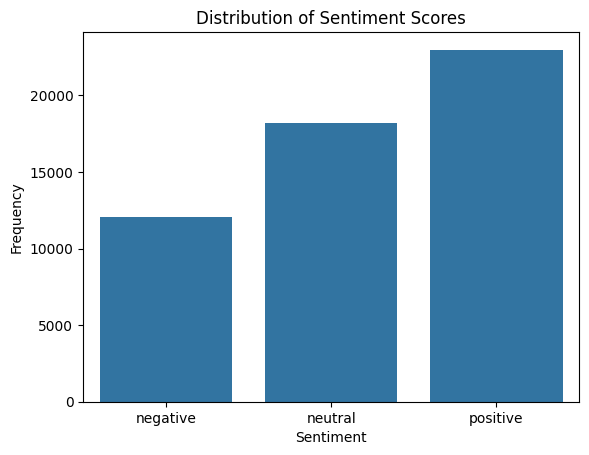

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
sns.countplot(x='textblob_sentiment', data=post_data, order=['negative', 'neutral', 'positive'])
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

### Sentiment Analysis - FinBERT

In [4]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

print(torch.cuda.is_available())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Device available: ", device)

model_name = "ProsusAI/finbert"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name).to(device)

True
Device available:  cuda


In [5]:
import re

def preprocess_text(text):
    # Convert text to string
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def tokenize_text(text):
    tokens = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    return tokens['input_ids'], tokens['attention_mask']

In [6]:
sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}

def predict_sentiment(text):
    input_ids, attention_mask = tokenize_text(text)
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    outputs = model(input_ids, attention_mask=attention_mask)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    predicted_sentiment = sentiment_map[predicted_label]
    return predicted_sentiment

In [7]:
import numpy as np
import pandas as pd

# Load your Reddit data into a DataFrame
df = pd.read_csv('reddit_wsb.csv')

# Reformat Dates into More Useful Information
df["date"] = pd.to_datetime(df["timestamp"]).dt.date
df["hour"] = pd.to_datetime(df["timestamp"]).dt.hour

# Define the start and end dates
start_date = '2021-01-28'  # Adjust based on your data's starting date
end_date = '2021-02-05'    # Adjust based on your desired end date

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the DataFrame based on the date range
filtered_df = df[(df['date'] >= start_date.date()) & (df['date'] <= end_date.date())]

# Preprocess and predict sentiment for each post
filtered_df["text"] = filtered_df.title + np.where(filtered_df.body.astype(str).replace('nan', '') != '', ' ' + filtered_df.body.astype(str), '')
print("Title and body combined...")
filtered_df['text'] = filtered_df['text'].apply(preprocess_text)
print("Text preprocessed...")
filtered_df['finbert_sentiment'] = filtered_df['text'].apply(predict_sentiment)
print("Sentiment predicted...")

# Analyze the sentiment results
sentiment_counts = filtered_df['finbert_sentiment'].value_counts()
print(sentiment_counts)

C:\Users\Tyler\AppData\Local\Temp\ipykernel_24172\1250102604.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["text"] = filtered_df.title + np.where(filtered_df.body.astype(str).replace('nan', '') != '', ' ' + filtered_df.body.astype(str), '')


Title and body combined...


C:\Users\Tyler\AppData\Local\Temp\ipykernel_24172\1250102604.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['text'] = filtered_df['text'].apply(preprocess_text)


Text preprocessed...
Sentiment predicted...
finbert_sentiment
positive    25166
neutral      2596
negative      790
Name: count, dtype: int64


C:\Users\Tyler\AppData\Local\Temp\ipykernel_24172\1250102604.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['finbert_sentiment'] = filtered_df['text'].apply(predict_sentiment)


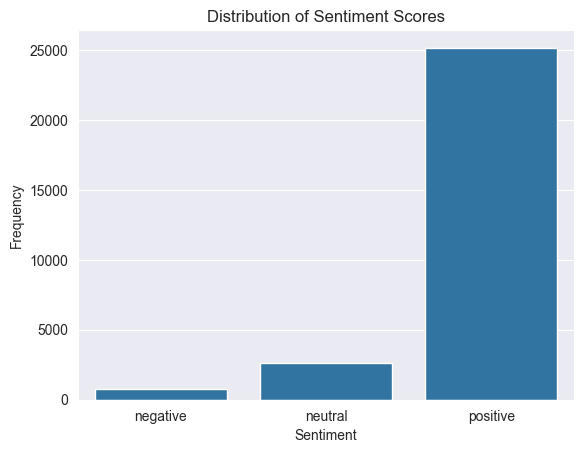

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
sns.countplot(x='finbert_sentiment', data=filtered_df, order=['negative', 'neutral', 'positive'])
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

In [9]:
# do df.head for each sentiment to see the first 5 rows of each sentiment and judge the accuracy of the model. only show the text and sentiment columns
filtered_df[filtered_df['finbert_sentiment'] == 'positive'].head(10)[['text', 'finbert_sentiment']]

,text,finbert_sentiment
0,its not about the money its about sending a me...,positive
2,exit the system the ceo of nasdaq pushed to ha...,positive
3,new sec filing for gme can someone less retard...,positive
4,not to distract from gme just thought our amc ...,positive
5,we breaking through,positive
6,short stock doesnt have an expiration date hed...,positive
7,this is the moment life isnt fair my mother al...,positive
8,currently holding amc and nok is it retarded t...,positive
9,i have nothing to say but bruh i am speechless...,positive
10,we need to keep this movement going we all can...,positive


In [10]:
filtered_df[filtered_df['finbert_sentiment'] == 'neutral'].head(10)[['text', 'finbert_sentiment']]

,text,finbert_sentiment
1,math professor scott steiner says the numbers ...,neutral
22,patcher and other media outlets calling this a...,neutral
35,my brokerage wants to force close my gme calls...,neutral
46,the real price for gme is infinity but at that...,neutral
52,dont be scared by the drop in bb gme etc hedge...,neutral
57,robinhood has literally shut down the ability ...,neutral
74,very conflicted wanting to buy tomorrow with a...,neutral
76,what is the next step obviously this gme hype ...,neutral
97,yesterdays data suggests that amc short seller...,neutral
107,nasdaq ceo suggests halt to trading to allow b...,neutral


In [11]:
filtered_df[filtered_df['finbert_sentiment'] == 'negative'].head(10)[['text', 'finbert_sentiment']]

,text,finbert_sentiment
194,can we all take a moment and appreciate the mo...,negative
243,gain porn gme nok bb,negative
292,guys check out nook bdr in brazil ewz is with ...,negative
467,its truly awesome what yall are doing i had ju...,negative
508,american airlines aal strong earnings report s...,negative
522,check pttn looks good great potential,negative
539,bant golden cross stock alert hi guys bant has...,negative
566,paas pan american silver to cheap to ignore pa...,negative
574,silver totally agree on slv as silver has been...,negative
597,nz has got your back even though robin hood ha...,negative


### Sentiment Analysis - RoBERTa

In [12]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax

print(torch.cuda.is_available())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Device available: ", device)

# Load the pre-trained model and tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define the sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']

True
Device available:  cuda


In [13]:
import re

def preprocess_text(text):
    # Convert text to string
    text = str(text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def tokenize_text(text):
    tokens = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    return tokens['input_ids'], tokens['attention_mask']

In [14]:
def predict_sentiment(text):
    # Tokenize the input text
    encoded_input = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512).to(device)
    
    # Get the model's output logits
    output = model(**encoded_input)
    
    # Convert logits to probabilities using softmax
    scores = softmax(output[0][0].detach().cpu().numpy())
    
    # Get the predicted sentiment label
    predicted_sentiment = sentiment_labels[scores.argmax()]
    
    return predicted_sentiment

In [15]:
# predict sentiment using the RoBERTa model, into the 'roberta_sentiment' column of the DataFrame
filtered_df['roberta_sentiment'] = filtered_df['text'].apply(predict_sentiment)
print("Sentiment predicted...")

# Analyze the sentiment results
sentiment_counts = filtered_df['roberta_sentiment'].value_counts()
print(sentiment_counts)

Sentiment predicted...
roberta_sentiment
neutral     13705
negative    10942
positive     3905
Name: count, dtype: int64


C:\Users\Tyler\AppData\Local\Temp\ipykernel_24172\776175079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['roberta_sentiment'] = filtered_df['text'].apply(predict_sentiment)


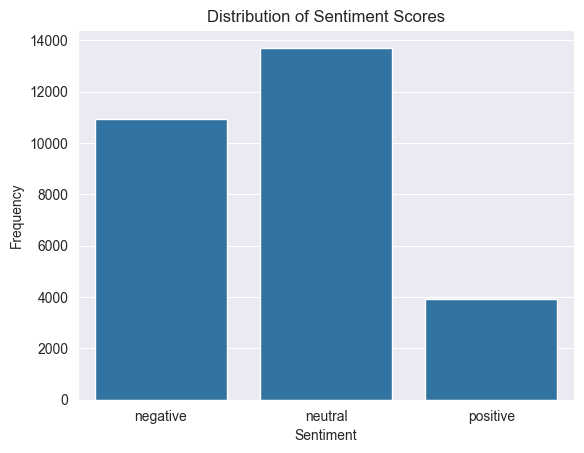

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
sns.countplot(x='roberta_sentiment', data=filtered_df, order=['negative', 'neutral', 'positive'])
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

In [17]:
# do filtered_df.head for each sentiment to see the first 5 rows of each sentiment and judge the accuracy of the model. only show the text and sentiment columns
filtered_df[filtered_df['roberta_sentiment'] == 'positive'].head(10)[['text', 'roberta_sentiment']]

,text,roberta_sentiment
5,we breaking through,positive
10,we need to keep this movement going we all can...,positive
14,i love you retards,positive
23,im so proud of how far this subreddit has come...,positive
33,i dont have as much as the rest of you guys bu...,positive
36,guys i just want to say i never been more prou...,positive
56,hear me and see me melvin this is a war you wa...,positive
61,the only two essential apps to download on the...,positive
68,pltr thank you everyone,positive
72,before you sleep tonight just think about this...,positive


In [18]:
filtered_df[filtered_df['roberta_sentiment'] == 'neutral'].head(10)[['text', 'roberta_sentiment']]

,text,roberta_sentiment
0,its not about the money its about sending a me...,neutral
2,exit the system the ceo of nasdaq pushed to ha...,neutral
4,not to distract from gme just thought our amc ...,neutral
6,short stock doesnt have an expiration date hed...,neutral
11,gme premarket musk approved,neutral
15,wasnt a meme gme,neutral
16,to the mass relays beyond,neutral
17,i come back to you now at the turn of the tide,neutral
19,daily discussion thread for january your daily...,neutral
20,gme premarket repeat after me is not a meme,neutral


In [19]:
filtered_df[filtered_df['roberta_sentiment'] == 'negative'].head(10)[['text', 'roberta_sentiment']]

,text,roberta_sentiment
1,math professor scott steiner says the numbers ...,negative
3,new sec filing for gme can someone less retard...,negative
7,this is the moment life isnt fair my mother al...,negative
8,currently holding amc and nok is it retarded t...,negative
9,i have nothing to say but bruh i am speechless...,negative
12,once youre done with gme ag and slv the gentle...,negative
13,gme price has nothing to do with fundamentals ...,negative
18,words brought to you by the fuckers at the sec,negative
21,we need to stick together and the ever lovin s...,negative
22,patcher and other media outlets calling this a...,negative


### Sentiment Analysis - FinBERT & RoBERTa Weighted Average

In [20]:
# Define the weights for the weighted average
finbert_weight = 0.2
roberta_weight = 0.8 # preference for RoBERTa due to its higher accuracy, but without completely ignoring FinBERT and its insights

In [21]:
# Define a function to calculate the weighted average sentiment
def weighted_average_sentiment(finbert_sentiment, roberta_sentiment):
    sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
    finbert_score = sentiment_mapping[finbert_sentiment]
    roberta_score = sentiment_mapping[roberta_sentiment]
    weighted_score = finbert_weight * finbert_score + roberta_weight * roberta_score
    if weighted_score < 0.5:
        return 'negative'
    elif weighted_score < 1.5:
        return 'neutral'
    else:
        return 'positive'

In [22]:
# Calculate the weighted average sentiment
filtered_df['weighted_sentiment'] = filtered_df.apply(lambda x: weighted_average_sentiment(x['finbert_sentiment'], x['roberta_sentiment']), axis=1)

C:\Users\Tyler\AppData\Local\Temp\ipykernel_24172\3610143036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['weighted_sentiment'] = filtered_df.apply(lambda x: weighted_average_sentiment(x['finbert_sentiment'], x['roberta_sentiment']), axis=1)


In [23]:
# Analyse the sentiment results
weighted_sentiment_counts = filtered_df['weighted_sentiment'].value_counts()
print(weighted_sentiment_counts)

weighted_sentiment
neutral     13705
negative    10942
positive     3905
Name: count, dtype: int64


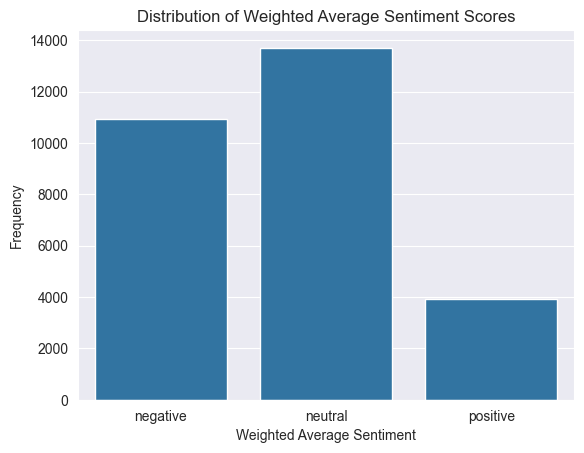

In [24]:
# Plot the distribution of sentiment labels
sns.countplot(x='weighted_sentiment', data=filtered_df, order=['negative', 'neutral', 'positive'])
plt.xlabel("Weighted Average Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of Weighted Average Sentiment Scores")
plt.show()

In [25]:
# do filtered_df.head for each sentiment to see the first 5 rows of each sentiment and judge the accuracy of the model. only show the text and sentiment columns 
filtered_df[filtered_df['weighted_sentiment'] == 'positive'].head(10)[['text', 'weighted_sentiment']]

,text,weighted_sentiment
5,we breaking through,positive
10,we need to keep this movement going we all can...,positive
14,i love you retards,positive
23,im so proud of how far this subreddit has come...,positive
33,i dont have as much as the rest of you guys bu...,positive
36,guys i just want to say i never been more prou...,positive
56,hear me and see me melvin this is a war you wa...,positive
61,the only two essential apps to download on the...,positive
68,pltr thank you everyone,positive
72,before you sleep tonight just think about this...,positive


In [26]:
filtered_df[filtered_df['weighted_sentiment'] == 'neutral'].head(10)[['text', 'weighted_sentiment']]

,text,weighted_sentiment
0,its not about the money its about sending a me...,neutral
2,exit the system the ceo of nasdaq pushed to ha...,neutral
4,not to distract from gme just thought our amc ...,neutral
6,short stock doesnt have an expiration date hed...,neutral
11,gme premarket musk approved,neutral
15,wasnt a meme gme,neutral
16,to the mass relays beyond,neutral
17,i come back to you now at the turn of the tide,neutral
19,daily discussion thread for january your daily...,neutral
20,gme premarket repeat after me is not a meme,neutral


In [27]:
filtered_df[filtered_df['weighted_sentiment'] == 'negative'].head(10)[['text', 'weighted_sentiment']]

,text,weighted_sentiment
1,math professor scott steiner says the numbers ...,negative
3,new sec filing for gme can someone less retard...,negative
7,this is the moment life isnt fair my mother al...,negative
8,currently holding amc and nok is it retarded t...,negative
9,i have nothing to say but bruh i am speechless...,negative
12,once youre done with gme ag and slv the gentle...,negative
13,gme price has nothing to do with fundamentals ...,negative
18,words brought to you by the fuckers at the sec,negative
21,we need to stick together and the ever lovin s...,negative
22,patcher and other media outlets calling this a...,negative
